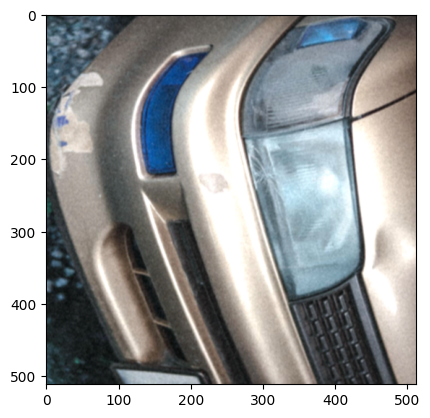

In [83]:
import albumentations as A
import cv2
import glob
import numpy as np
import random
from matplotlib import pyplot as plt

def visualize(image):
    plt.imshow(image)
    
    
# Load images of different sizes
images = glob.glob('D:/FDM_DOWNLOAD/test/test/images/7202.jpg')
#images = [cv2.imread(img) for img in images]
images = cv2.imread(images[0]) 
image = np.array(images)
#plt.imshow(images)

# Albumentations transforms
transforms = A.Compose([
    A.Resize(width=512, height=512), # Scale all images to 256x256
    
    A.Flip(p=0.5), # Random flip half the images horizontally
    A.Transpose(p=0.5), # Random transpose half the images
    A.RandomBrightnessContrast(p=0.2), 
    A.MedianBlur(blur_limit=3, p=0.1),
    A.MotionBlur(p=0.2),
    A.GaussNoise(p=0.1),
    A.OpticalDistortion(p=0.3),
    A.GridDistortion(p=0.1),
    A.ElasticTransform(p=0.1, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03),
    A.HueSaturationValue(p=0.3),
    A.CLAHE(p=0.1),
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.5),
    A.CoarseDropout(p=0.5)  
])
random.seed(42) 
augmented_image = transforms(image=image)['image']
visualize(augmented_image)



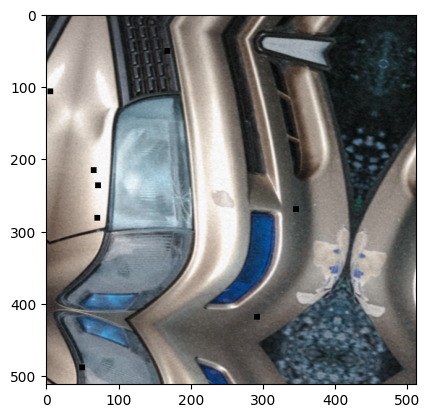

In [102]:

	random.seed(52) 
	augmented_image = transforms(image=image)['image']
	visualize(augmented_image)
	random.seed(52) 
	augmented_image = transforms(image=image)['image']
	visualize(augmented_image)

In [142]:
import albumentations as A
import cv2 
import pandas as pd
import os
#path=D:/FDM_DOWNLOAD/test/test/images/7202.jpg


def Augmentation(path):
# Load image and CSV  
    images = glob.glob(path)
    df = pd.read_csv('train/train.csv')
    
    filename = os.path.basename(images[0])
    


    # Define transforms
    transforms = A.Compose([
        A.Resize(width=512, height=512), # Scale all images to 256x256

        A.Flip(p=0.5), # Random flip half the images horizontally
        A.Transpose(p=0.5), # Random transpose half the images
        A.RandomBrightnessContrast(p=0.2), 
        A.MedianBlur(blur_limit=3, p=0.1),
        A.MotionBlur(p=0.2),
        A.GaussNoise(p=0.1),
        A.OpticalDistortion(p=0.3),
        A.GridDistortion(p=0.1),
        A.ElasticTransform(p=0.1, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03),
        A.HueSaturationValue(p=0.3),
        A.CLAHE(p=0.1),
        A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.5),
        A.CoarseDropout(p=0.5)  
    ])


    # Get label from CSV
    matches = df.loc[df['filename'] == filename]
    if len(matches) > 0:
       label = matches.iloc[0]['label']
    else:
       print("No match found")

    output_dir = 'augmented_images'
    os.makedirs(output_dir, exist_ok=True)
    aug_images = []

    for i in range(15):

        # Augment image
        aug_img = transforms(image=image)['image']
        aug_images.append(aug_img)

        # File name for augmented image
        aug_file = f'{filename}_aug{i}.jpg'

        # Save image 
        cv2.imwrite(os.path.join(output_dir, aug_file), aug_img)
        new_row = {'filename': aug_file, 'label': label}

        df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
        # Append CSV row 



    # Save CSV
    df.to_csv('updated_labels_train.csv', index=False)

    #print(filename,'Done!')

In [154]:
folder = 'C:/Users/Sri Ram/Untitled Folder 8/train/images'  

import os
from tqdm import tqdm
from PIL import Image
#import augmentations # custom augmentations



image_paths = []
for root, _, files in os.walk(folder):
        for file in tqdm(files): 
            if file.endswith((".jpg", ".jpeg", ".png")):
                image_path = os.path.join(root, file)
                Augmentation(path)
                
                pass


   


  1%|▌                                                                               | 49/7200 [00:22<54:19,  2.19it/s]


KeyboardInterrupt: 